In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('house-train.csv', usecols=['FireplaceQu', 'GarageQual', 'SalePrice'])

In [5]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [4]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

# applying random imputation 

In [52]:
from sklearn.model_selection import train_test_split

x = df
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [53]:
x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']

x_train['GarageQual_imputed'] = x_train['GarageQual']
x_test['GarageQual_imputed'] = x_test['GarageQual']

### didn't removed saleprice to check 

In [54]:
# fill the missing
mask = x_train['FireplaceQu_imputed'].isnull()
x_train['FireplaceQu_imputed'][mask] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values

mask = x_train['GarageQual_imputed'].isnull()
x_train['GarageQual_imputed'][mask] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values

C:\Users\UTSAV\AppData\Local\Temp\ipykernel_11844\3890253867.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['FireplaceQu_imputed'][mask] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
C:\U

In [55]:
print(len(x_train['FireplaceQu']) / len(x['FireplaceQu']))

0.85


### because 15 percent data is used in testing

In [58]:
temp = pd.concat(
    [
        x_train['GarageQual'].value_counts() / len(x_train['GarageQual'].dropna()),
        x_train['GarageQual_imputed'].value_counts() / len(df)
    ],
    axis=1)
temp.columns = ['original', 'imputed']
temp

,original,imputed
TA,0.948936,0.807534
Fa,0.034894,0.028767
Gd,0.011915,0.009589
Ex,0.002553,0.002055
Po,0.001702,0.002055


In [59]:
temp = pd.concat(
    [
        x_train['FireplaceQu'].value_counts() / len(x_train['FireplaceQu'].dropna()),
        x_train['FireplaceQu_imputed'].value_counts() / len(df)
    ],
    axis=1)
temp.columns = ['original', 'imputed']
temp

,original,imputed
Gd,0.490881,0.417808
TA,0.407295,0.347945
Fa,0.045593,0.037671
Ex,0.031915,0.026712
Po,0.024316,0.019863


In [70]:
x_train_new = x_train.drop(columns=['SalePrice'])
x_train_new

,FireplaceQu,GarageQual,FireplaceQu_imputed,GarageQual_imputed
984,NaN,TA,Gd,TA
777,Fa,TA,Fa,TA
707,Gd,TA,Gd,TA
598,TA,TA,TA,TA
874,NaN,TA,TA,TA
...,...,...,...,...
1095,Gd,TA,Gd,TA
1130,TA,TA,TA,TA
1294,NaN,TA,TA,TA
860,Gd,TA,Gd,TA


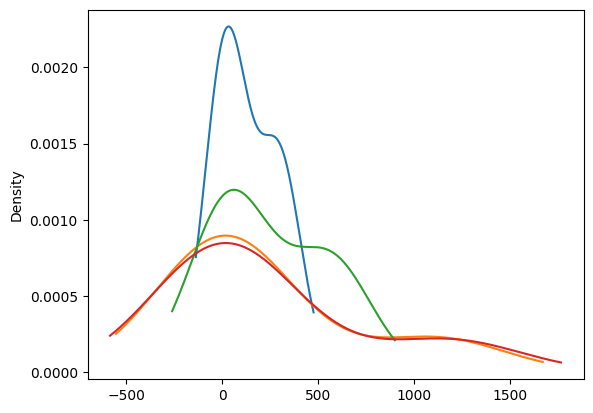

In [71]:
for category in x_train_new:
    x_train_new[category].value_counts().plot(kind='kde')

In [ ]:
for category in x.drop(columns=['']):
    x_train_new[category].value_counts().plot(kind='kde')